<a id='item41'></a>

## 9.CNN

## Import Keras and Packages

Let's start by importing the keras libraries and the packages that we would need to build a neural network.

In [98]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
import matplotlib.pyplot as plt

When working with convolutional neural networks in particular, we will need additional packages.

In [99]:
from keras.layers import Conv2D # to add convolutional layers
from keras.layers import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers



<a id='item42'></a>

## Convolutional Layer with One set of convolutional and pooling layers

In [100]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Let's normalize the pixel values to be between 0 and 1

In [101]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

Next, let's convert the target variable into binary categories

In [102]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

Next, let's define a function that creates our model. Let's start with one set of convolutional and pooling layers.

In [103]:
# Define the first model (one set of convolutional and pooling layers)
def convolutional_model_1():
    model = Sequential()
    
    # First convolutional layer (with 32 filters) and Batch Normalization
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())  # Batch Normalization
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten the output
    model.add(Flatten())
    
    # Fully connected layer
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


Finally, let's call the function to create the model, and then let's train it and evaluate it.

In [104]:
# Define early stopping for Model 1 (monitoring 'val_loss' with patience 3)
early_stopping_1 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Build the model
model = convolutional_model_1()

# Fit the model with early stopping and store the history
history_1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2, callbacks=[early_stopping])

Epoch 1/10
300/300 - 20s - 66ms/step - accuracy: 0.9062 - loss: 0.3068 - val_accuracy: 0.9536 - val_loss: 0.6867
Epoch 2/10
300/300 - 17s - 55ms/step - accuracy: 0.9657 - loss: 0.1158 - val_accuracy: 0.9797 - val_loss: 0.0735
Epoch 3/10
300/300 - 17s - 56ms/step - accuracy: 0.9753 - loss: 0.0823 - val_accuracy: 0.9837 - val_loss: 0.0473
Epoch 4/10
300/300 - 17s - 56ms/step - accuracy: 0.9797 - loss: 0.0658 - val_accuracy: 0.9841 - val_loss: 0.0498
Epoch 5/10
300/300 - 16s - 55ms/step - accuracy: 0.9818 - loss: 0.0565 - val_accuracy: 0.9862 - val_loss: 0.0427
Epoch 6/10
300/300 - 17s - 55ms/step - accuracy: 0.9840 - loss: 0.0502 - val_accuracy: 0.9858 - val_loss: 0.0472
Epoch 7/10
300/300 - 16s - 54ms/step - accuracy: 0.9857 - loss: 0.0435 - val_accuracy: 0.9813 - val_loss: 0.0639
Epoch 8/10
300/300 - 16s - 54ms/step - accuracy: 0.9871 - loss: 0.0386 - val_accuracy: 0.9849 - val_loss: 0.0613


In [106]:
# Evaluate the first model
scores_1 = model.evaluate(X_test, y_test, verbose=0)
print("Model 1 - Accuracy: {} \n Error: {}".format(scores_1[1], 100-scores_1[1]*100))

Model 1 - Accuracy: 0.9861999750137329 
 Error: 1.380002498626709


------------------------------------------

<a id='item43'></a>

## Convolutional Layer with two sets of convolutional and pooling layers

Let's redefine our convolutional model so that it has two convolutional and pooling layers instead of just one layer of each.

In [107]:
# Define the second model (two sets of convolutional and pooling layers)
def convolutional_model_2():
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


Now, let's call the function to create our new convolutional neural network, and then let's train it and evaluate it.

In [108]:
# Define early stopping for Model 2 (monitoring 'val_accuracy' with patience 4)
early_stopping_2 = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

# Build the second model
model_2 = convolutional_model_2()


# Fit the second model with early stopping
history_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2, callbacks=[early_stopping])


Epoch 1/10
300/300 - 7s - 23ms/step - accuracy: 0.7914 - loss: 0.6607 - val_accuracy: 0.9594 - val_loss: 0.1402
Epoch 2/10
300/300 - 4s - 13ms/step - accuracy: 0.9413 - loss: 0.2004 - val_accuracy: 0.9723 - val_loss: 0.0872
Epoch 3/10
300/300 - 4s - 13ms/step - accuracy: 0.9564 - loss: 0.1477 - val_accuracy: 0.9778 - val_loss: 0.0675
Epoch 4/10
300/300 - 4s - 13ms/step - accuracy: 0.9632 - loss: 0.1228 - val_accuracy: 0.9823 - val_loss: 0.0587
Epoch 5/10
300/300 - 4s - 13ms/step - accuracy: 0.9678 - loss: 0.1099 - val_accuracy: 0.9839 - val_loss: 0.0550
Epoch 6/10
300/300 - 4s - 13ms/step - accuracy: 0.9702 - loss: 0.1010 - val_accuracy: 0.9858 - val_loss: 0.0489
Epoch 7/10
300/300 - 4s - 13ms/step - accuracy: 0.9720 - loss: 0.0952 - val_accuracy: 0.9853 - val_loss: 0.0443
Epoch 8/10
300/300 - 4s - 13ms/step - accuracy: 0.9740 - loss: 0.0877 - val_accuracy: 0.9867 - val_loss: 0.0414
Epoch 9/10
300/300 - 4s - 13ms/step - accuracy: 0.9755 - loss: 0.0825 - val_accuracy: 0.9881 - val_loss:

In [109]:
# Evaluate the second model
scores_2 = model_2.evaluate(X_test, y_test, verbose=0)
print("Model 2 - Accuracy: {} \n Error: {}".format(scores_2[1], 100-scores_2[1]*100))

Model 2 - Accuracy: 0.9872000217437744 
 Error: 1.2799978256225586


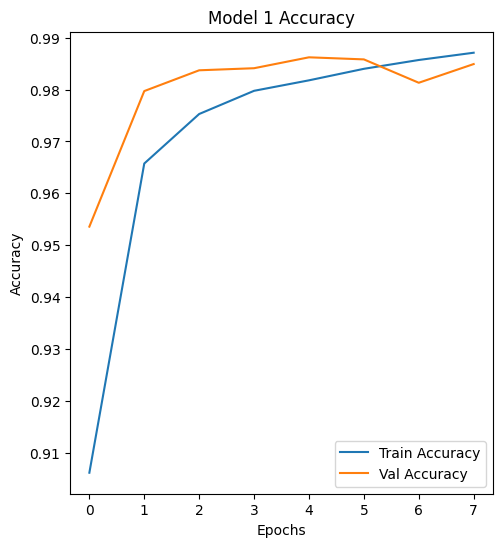

In [110]:
# Plot training history for both models
plt.figure(figsize=(12, 6))

# Model 1 - Accuracy and Loss
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Val Accuracy')
plt.title('Model 1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



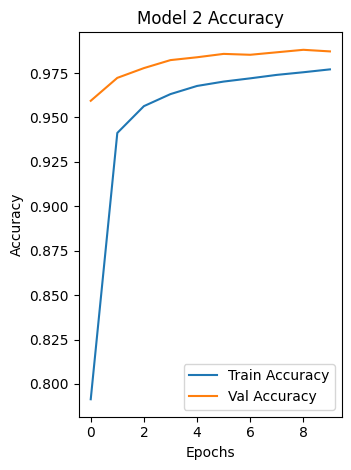

In [111]:
# Model 2 - Accuracy and Loss
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Val Accuracy')
plt.title('Model 2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

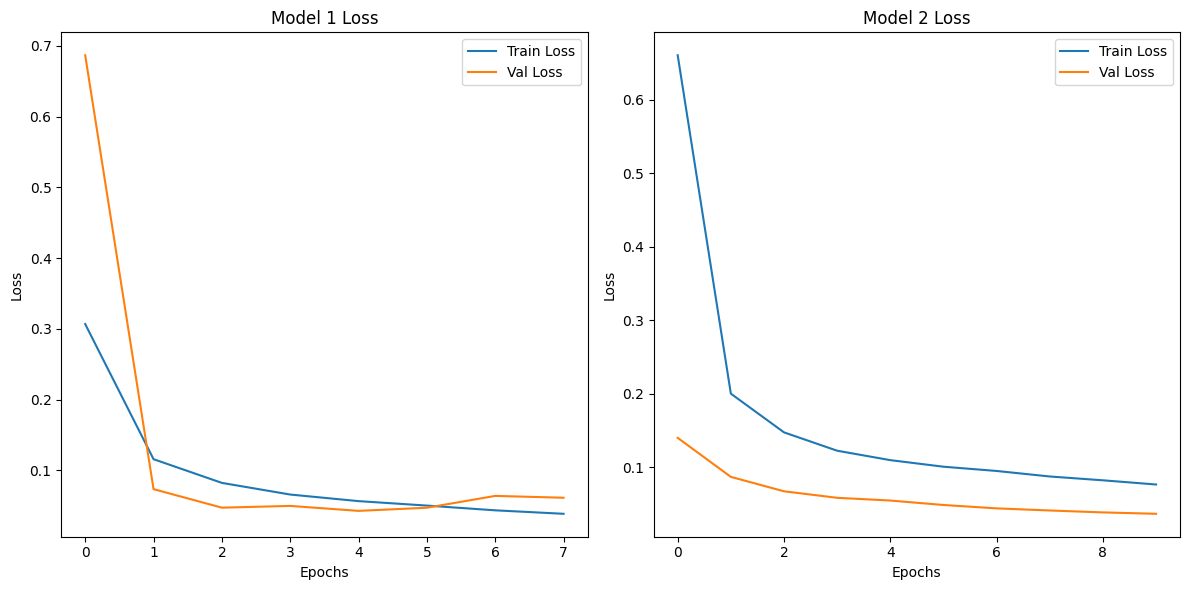

In [112]:
# Plot loss history for both models
plt.figure(figsize=(12, 6))

# Model 1 - Loss
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Val Loss')
plt.title('Model 1 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Model 2 - Loss
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Val Loss')
plt.title('Model 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


References:https://github.com/ayushman1024/Machine-Learning-Deep-Learning-Algorithms/blob/master/Deep%20Learning/DL0101EN-4-1-Convolutional-Neural-Networks-with-Keras-py-v1.0.ipynb